In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# load the data
df=pd.read_csv("C:\\Users\\patel\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python312\\Matplotlib\\netflix project\\netflix_titles.csv")
# print(df.head(5))

Clean the data

C:\Users\patel\AppData\Local\Temp\ipykernel_6748\3268281964.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


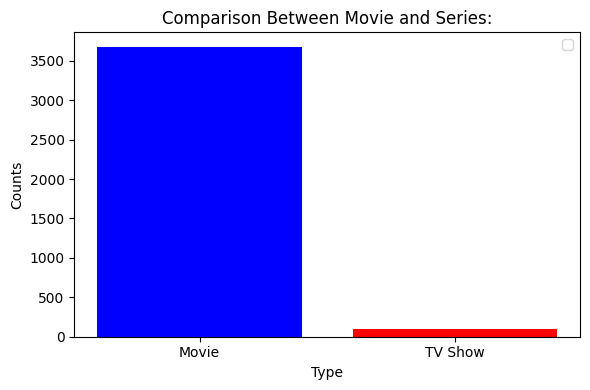

In [5]:
df=df.dropna(subset=['show_id','type','title','director','cast','country','date_added','release_year','rating','duration','listed_in','description'])
types_cnt=df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(types_cnt.index, types_cnt.values, color=['blue','red'])
plt.title("Comparison Between Movie and Series:")
plt.xlabel("Type")
plt.ylabel("Counts")
plt.legend()
plt.savefig("tvshow_movies.png")
plt.tight_layout()
plt.show()

Showing Ratings in Piechart

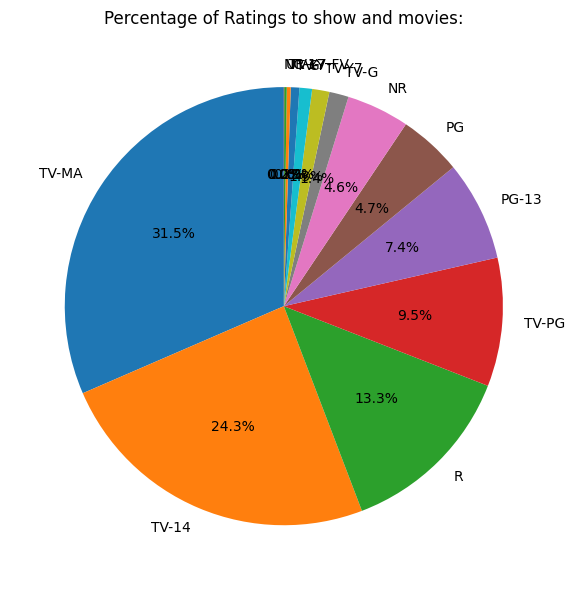

In [11]:
rating_cnt=df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_cnt,labels=rating_cnt.index, autopct="%1.1f%%", startangle=90)
plt.title("Percentage of Ratings to show and movies:")
plt.tight_layout()
plt.savefig("rating_pie.png")
plt.show()


movies duration with histogram

C:\Users\patel\AppData\Local\Temp\ipykernel_7488\1756655767.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


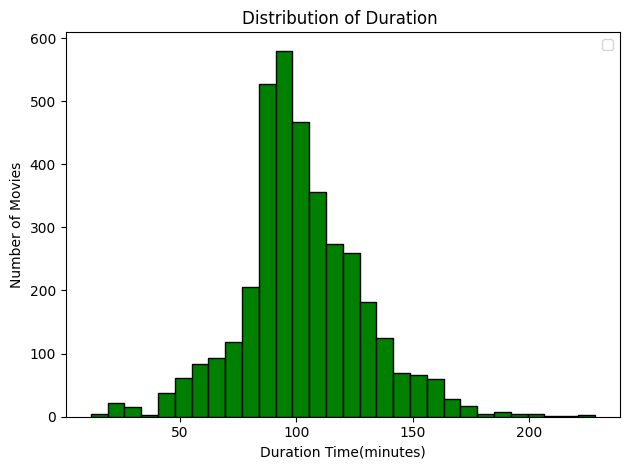

In [15]:
movie_df=df[df['type']=='Movie'].copy()
movie_df['duration_int']=movie_df['duration'].str.replace(' min','').astype(int)

plt.hist(movie_df['duration_int'],bins=30, color='green', edgecolor='black')
plt.title("Distribution of Duration ")
plt.xlabel('Duration Time(minutes)')
plt.ylabel("Number of Movies")
plt.legend()
plt.savefig("hist_duration.png")
plt.tight_layout()
plt.show()

scatter plot as per year

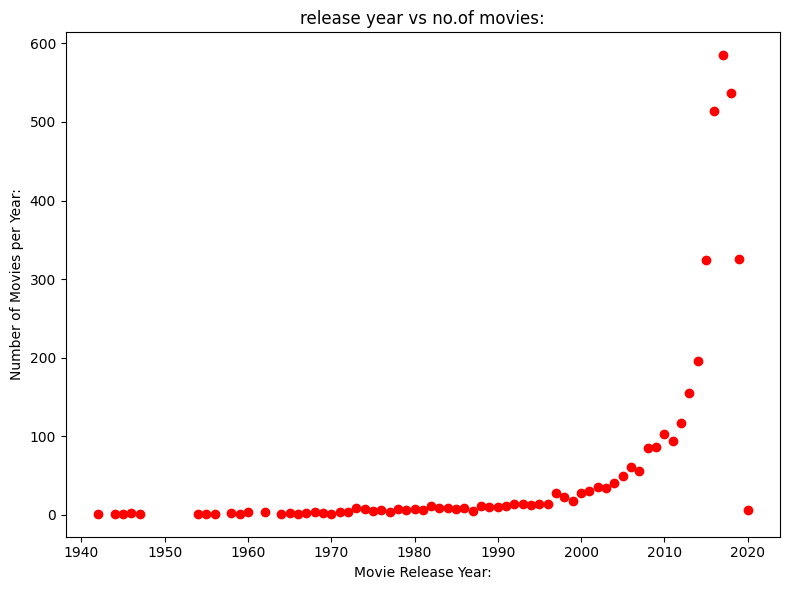

In [7]:
release_cnt=df['release_year'].value_counts().sort_index()
plt.figure(figsize=(8,6))
plt.scatter(release_cnt.index,release_cnt.values,color="red")
plt.title("release year vs no.of movies:")
plt.xlabel("Movie Release Year:")
plt.ylabel("Number of Movies per Year:")
plt.tight_layout()
plt.savefig("scaterplot.png")
plt.show()

top 10 country uploading movie

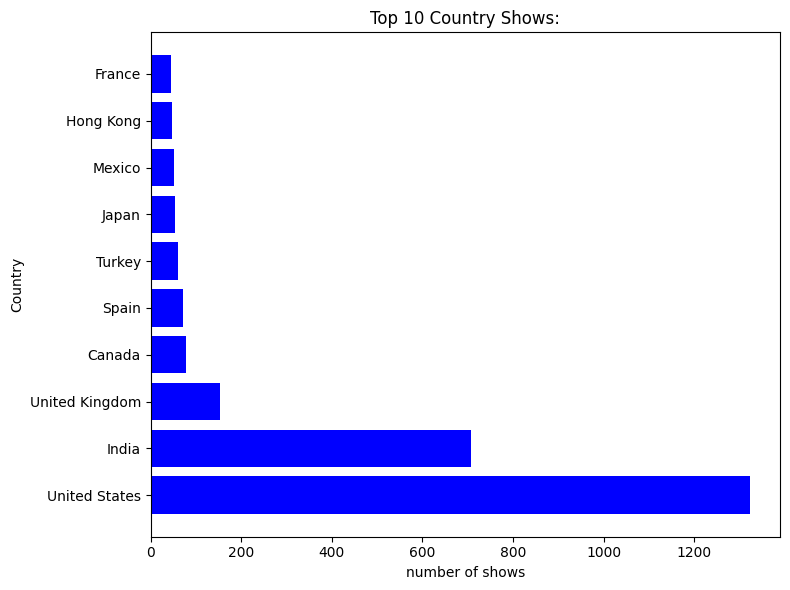

In [8]:
country_cnt=df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_cnt.index,country_cnt.values, color="blue")
plt.title("Top 10 Country Shows:")
plt.xlabel("number of shows")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig("top10country.png")
plt.show()

Subplot 

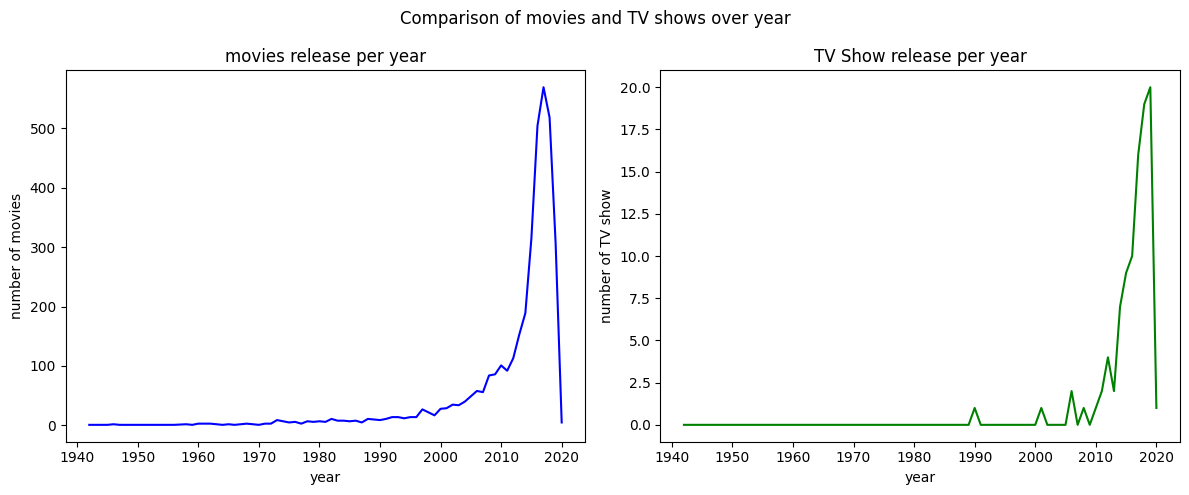

In [17]:
content_year=df.groupby(['release_year','type']).size().unstack().fillna(0)
fig, ax=plt.subplots(1,2, figsize=(12,5))

# subplot movies
ax[0].plot(content_year.index, content_year['Movie'], color="blue")
ax[0].set_title('movies release per year')
ax[0].set_xlabel('year')
ax[0].set_ylabel('number of movies')

# subplot Shows
ax[1].plot(content_year.index, content_year['TV Show'], color="green")
ax[1].set_title('TV Show release per year')
ax[1].set_xlabel('year')
ax[1].set_ylabel('number of TV show')


fig.suptitle("Comparison of movies and TV shows over year")
plt.tight_layout()
plt.savefig("Comparison TV_movies.png")
plt.show()